In [9]:
%matplotlib inline
from matplotlib.pyplot import imshow
import numpy as np
import cv2 as cv

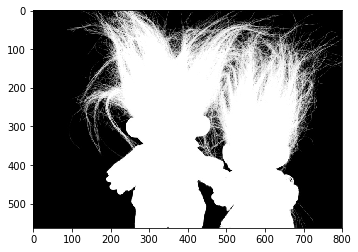

In [6]:
from PIL import Image
im = Image.open("D:\\Image Matting Dataset\\adobe dataset\\Combined_Dataset\\Training_set\\Other\\alpha\\GT04.jpg").convert('RGB')
imshow(im)

In [13]:
im.getpixel((1500,1000))

(255, 255, 255)

In [14]:
im.size

(3280, 2310)

In [15]:
img_trimap = Image.new('RGB', im.size, color = "black")

In [23]:
img_trimap.size

(3280, 2310)

In [16]:
trimap_arr = img_trimap.load()

In [32]:
trimap_pix = img_trimap.getdata()

In [36]:
len(list(trimap_pix))

7576800

In [18]:
def index_in_boundaries(i, j, alpha_matte):
    cols = alpha_matte.size[0]
    rows = alpha_matte.size[1]
    if i >= 0 and i < cols:
        if j >= 0 and j < rows:
            return True
    return False

In [28]:
def determine_color_for_pixel(i, j, alpha_matte, window_size=1):
    pixels_in_window = set()
    for i_s in range(i - window_size, i + window_size + 1):
        for j_s in range(j - window_size, j + window_size + 1):
            if index_in_boundaries(i_s, j_s, alpha_matte):
                pixels_in_window.add(alpha_matte.getpixel((i_s, j_s)))
    if len(pixels_in_window) == 1:
        # means there is only 1 color in the surrounding window
        if (0, 0, 0) in pixels_in_window:
            # means the only color is black
            return (0, 0, 0)
        else:# (255, 255, 255) in pixels_in_window:
            # there are only white pixels in the window
            
            return (255, 255, 255)
    else:
        # it's a border pixel, color it in gray
        return (125, 125, 125)

In [29]:
def color_all_pixels(img_trimap, alpha_matte, window_size=1):
    trimap_pixels = img_trimap.load()
#     alpha_matte_pix = list(alpha_matte.getdata())
    for i in range(img_trimap.size[0]):
        for j in range(img_trimap.size[1]):
            color = determine_color_for_pixel(i, j, alpha_matte_pix, window_size)
#             if type(color) != type((0,0,0)):
#                 print(color)
            trimap_pixels[i, j] = color
    

In [44]:
color_all_pixels(img_trimap, im, 3)

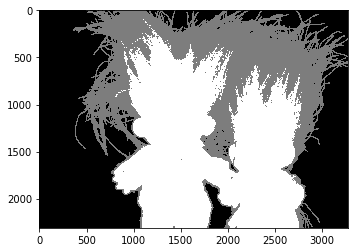

In [45]:
imshow(img_trimap)

In [37]:
import cv2

In [59]:
kernel = np.ones((5,5),np.uint8)

In [60]:
dilation = cv2.dilate(np.array(img_trimap),kernel,iterations = 10)

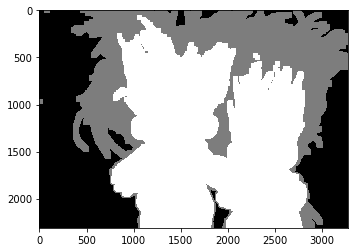

In [58]:
imshow(dilation)

In [48]:
type(dilation)

numpy.ndarray

In [49]:
from scipy.misc import imsave

In [50]:
imsave("out.png", dilation)

C:\Users\thalv\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  if __name__ == '__main__':


###################### opencv

In [61]:
import matplotlib.pyplot as plt
import cv2

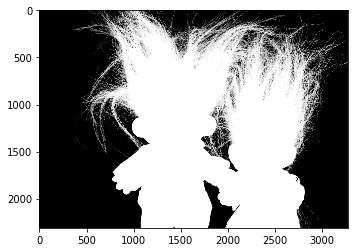

In [62]:
image = cv2.imread("../27/gt/GT04.png")
plt.imshow(image, cmap="gray")

##### trimap

In [63]:
from scipy import misc,ndimage

In [70]:
alpha = np.array(im)
trimap = np.copy(alpha)
k_size = 40

In [71]:
trimap[np.where((ndimage.grey_dilation(alpha[:,:,0],size=(k_size,k_size)) - ndimage.grey_erosion(alpha[:,:,0],size=(k_size,k_size)))!=0)] = 128

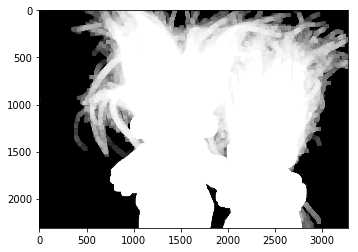

In [77]:
imshow(ndimage.grey_dilation(alpha[:,:,0],size=(k_size,k_size)), cmap="gray")

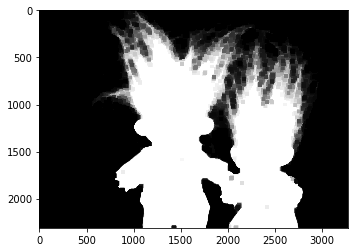

In [78]:
imshow(ndimage.grey_erosion(alpha[:,:,0],size=(k_size,k_size)), cmap="gray")

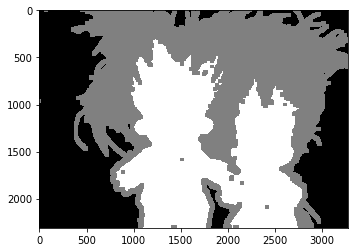

In [72]:
imshow(trimap)

In [39]:
def generate_trimap(alpha):
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
    fg = np.array(np.equal(alpha, 255).astype(np.float32))
    fg = cv.erode(fg, kernel, iterations=np.random.randint(1, 10))

    unknown = np.array(np.not_equal(alpha, 0).astype(np.float32))
    unknown = cv.dilate(unknown, kernel, iterations=np.random.randint(1, 20))
    trimap = fg * 255 + (unknown - fg) * 128
    return trimap.astype(np.uint8)

In [40]:
trimap = generate_trimap(np.array(im))

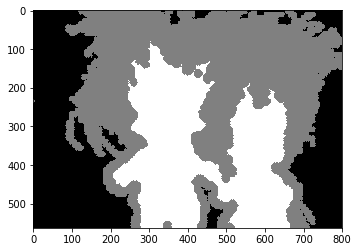

In [41]:
imshow(trimap)